In [1]:
import matplotlib.pyplot as plt
from endfiresim.wave import CWaveModelSpheric
from endfiresim.sensor import CSensor
import numpy as np

Effective gain (1) for incident direction:  0.0 dB
Effective gain (2) for incident direction:  0.0 dB


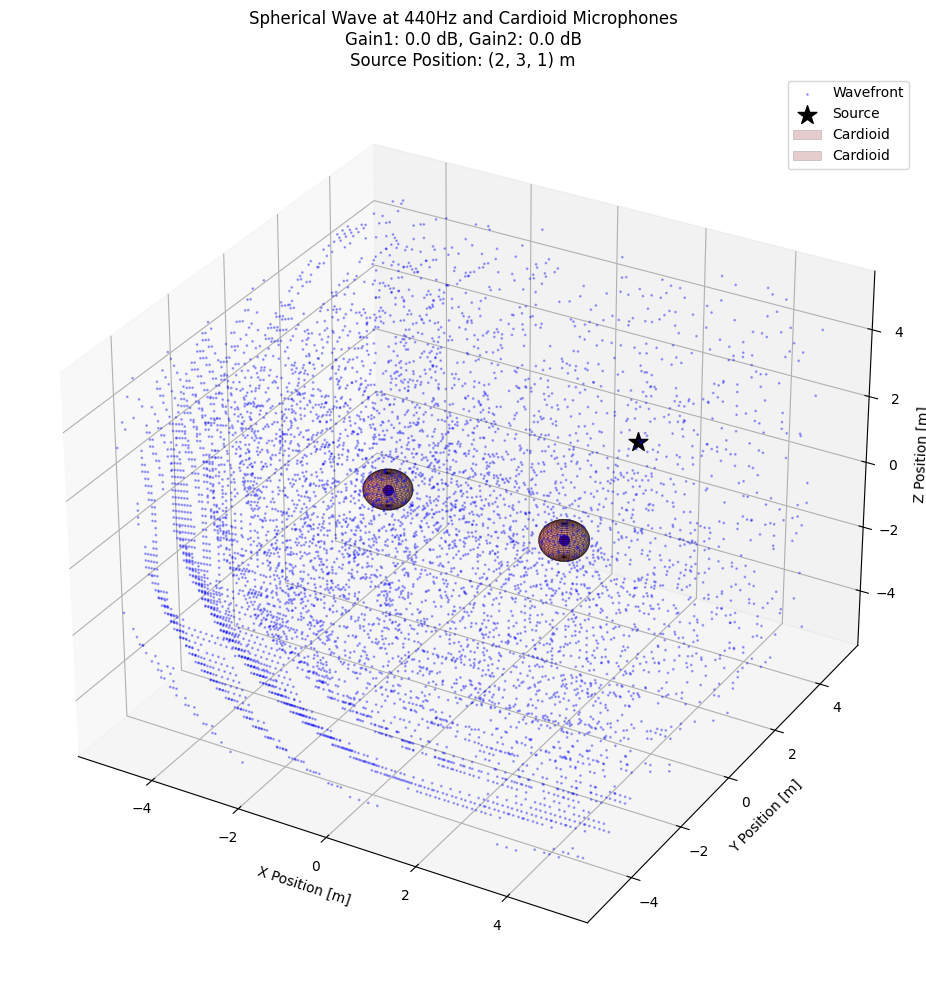

In [2]:
# Basic properties
freq = 440
azim_wave = np.pi/16
fs = 48000
dur = 1.0

# Scenario objects
ts = np.arange(0, dur, 1/fs)
cardioid1 = CSensor((-2, 0, 0))
cardioid2 = CSensor((2, 0, 0))
sw = CWaveModelSpheric(freq, source_xyz=(2, 3, 1))
signal1, gain1 = cardioid1.receive(sw, ts)
signal2, gain2 = cardioid2.receive(sw, ts)

# Computed gain for incident
gain1 = 20*np.log10(gain1)
gain2 = 20*np.log10(gain2)
print("Effective gain (1) for incident direction: ", np.round(gain1, 2), "dB")
print("Effective gain (2) for incident direction: ", np.round(gain2, 2), "dB")

# Entire wave as scatter map
x = y = z = np.linspace(-5, 5, 50)
X, Y, Z = np.meshgrid(x, y, z)
p = sw.p(0, (X, Y, Z))
pr = np.real(p)

# Plot (scatter workaround)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
threshold = 0.1
mask = np.abs(pr - threshold) < 0.01
ax.scatter(X[mask], Y[mask], Z[mask], c='b', s=1, alpha=0.3, label='Wavefront')
ax.scatter(2, 3, 1, c='k', s=200, marker='*', label='Source')

cardioid1.to_plot(ax)
cardioid2.to_plot(ax)

ax.set_xlabel('X Position [m]')
ax.set_ylabel('Y Position [m]') 
ax.set_zlabel('Z Position [m]') 
ax.set_title(f'Spherical Wave at {freq}Hz and Cardioid Microphones\n'
             f'Gain1: {gain1:.1f} dB, Gain2: {gain2:.1f} dB\n'
             f'Source Position: {sw.source_xyz} m')

ax.legend()
plt.tight_layout()
plt.grid()
plt.show()

